In [5]:
image_1 = 'D:\\T.I\BootcampAvanti_ML\\DeteccaoMelanoma_ML\\train\\Benign\\38.jpg'
image_2 = 'D:\\T.I\BootcampAvanti_ML\\DeteccaoMelanoma_ML\\train\\Benign\\22.jpg'

# Segmentação Baseada em Limiarização

In [ ]:
import cv2
import numpy as np
from PIL import Image

def segment_by_threshold(image_path, threshold_value=128):
    # Carregar a imagem
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Aplicar limiarização
    _, thresholded = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    
    # Converter para imagem PIL e salvar
    mask_image = Image.fromarray(thresholded)
    mask_image.save(image_path.replace('.jpg', '_mask.png'))

# Exemplo de uso
segment_by_threshold('path/to/your/image.jpg')


# Segmentação Baseada em Regiões

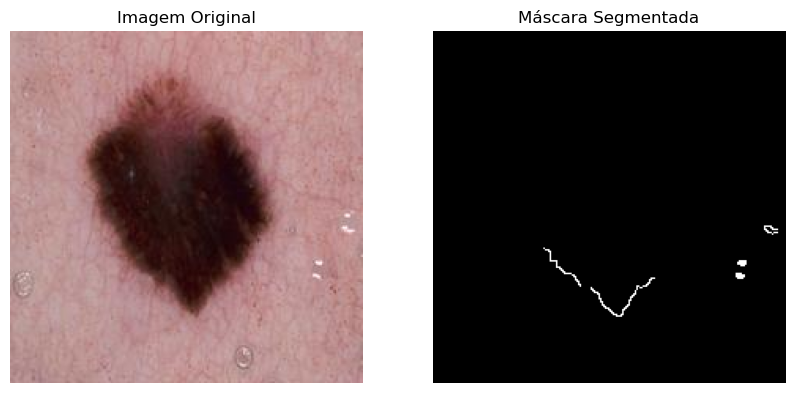

In [6]:
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def segment_by_region(image_path):
    # Carregar a imagem
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Aplicar um filtro de desfoque para reduzir o ruído
    blurred = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Aplicar detecção de bordas
    edges = cv2.Canny(blurred, 100, 200)
    
    # Encontrar contornos
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Criar uma máscara
    mask = np.zeros_like(gray_image)
    
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    
    # Plotar a imagem original e a máscara
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Máscara Segmentada')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()

# Exemplo de uso
segment_by_region(image_2)


# Segmentação Baseada em Cores

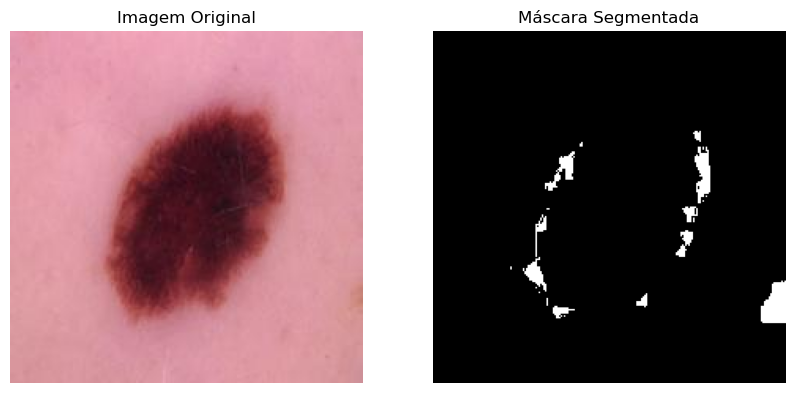

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def segment_by_color(image_path, lower_bound, upper_bound):
    # Carregar a imagem
    image = cv2.imread(image_path)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Definir os limites de cor
    lower_bound = np.array(lower_bound, dtype=np.uint8)
    upper_bound = np.array(upper_bound, dtype=np.uint8)
    
    # Criar uma máscara baseada nos limites de cor
    mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
    
    # Plotar a imagem original e a máscara
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title('Imagem Original')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title('Máscara Segmentada')
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.show()

# Exemplo de uso: segmentar cores entre 0-10 H, 50-255 S, 50-255 V
segment_by_color(image_1, [0, 50, 50], [10, 255, 255])
